# @**Prodigy InfoTech : Group Customers Of Retail Store Analysis Using  K-Means**

#**Summary To Explain Project (Keypoints)**

*  Display Top 5 Rows && Last 5 Rows of The Dataset
*  Importing necessary libraries and installing the "kaleido" package for exporting plots.
*  Defining various plotting functions for box plots, bar plots, scatter matrix plots, correlation plots, scree plots, line plots, scatter plots, and pie charts.
*  Reading the "customerStoreDataSet.csv" file into a DataFrame called customerStore.
*  Performing data preprocessing steps such as handling missing values, calculating new columns (e.g., customer age, total spent), and transforming categorical variables.
*  Visualizing a scatter matrix plot using the scatmat_plot function.
*  Generating descriptive statistics using the describe method.
*  Filtering out any erroneous data points.
*  Standardizing the numerical features using StandardScaler.
*  Performing Principal Component Analysis (PCA) on the standardized data to reduce dimensionality.
*  Creating a scree plot to visualize the explained variance ratio of each principal component.
*  Selecting the top principal components that explain 80% of the variance.
*  Using the Elbow method to determine the optimal number of clusters for K-means clustering.
*  Applying K-means clustering with four clusters to the reduced dataset.
*  Assigning cluster labels to the original dataset and sorting it based on the cluster labels.
*  Visualizing the distribution of customers across clusters using a pie chart.
*  Creating scatter plots to analyze relationships between different variables based on the clusters.
*  Generating box plots to compare the distribution of customer age and customer days across clusters.
*  Creating bar plots to analyze the distribution of education level and marital status across clusters.
*  Generating box plots to compare the spending on different products across clusters.
*  Exporting the plots as PNG images.

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00


In [2]:
import plotly.express as px
import plotly.graph_objects as go

def box_plot(dataf, y, color, title, height=600, width=1000):
    fig = px.box(dataf,  y=y,color=color,title=title,color_discrete_sequence=['#20bf6b', '#fa8231', '#3867d6', '#eb3b5a'], points="all")
    fig.update_layout(height = height, width = width,font_color='#484848',template='plotly_white')
    return fig

def bar_plot(dataf, x, y, color, title, x_label='X', y_label='Y', height=600, width=1000):
    fig = px.bar(dataf, x=x, y=y, color=color,title=title,color_discrete_sequence=['#20bf6b', '#fa8231', '#3867d6', '#eb3b5a'],barmode="group")
    fig.update_layout(height = height, width = width,xaxis_title=x_label,yaxis_title=y_label,font_color='#484848',template='plotly_white')
    return fig

def scatmat_plot(dataf, dimensions, color, title, height = 1500, width = 1500):
    fig = px.scatter_matrix(dataf,dimensions=dimensions,color=color,title=title,color_discrete_sequence=['#20bf6b', '#fa8231', '#3867d6', '#eb3b5a'])
    fig.update_traces(diagonal_visible=False)
    fig.update_layout(height = height, width = width,font_color='#484848',template='plotly_white')
    return fig

def corr_plot(x, y , z, title, height = 900, width = 900):
    trace = go.Figure(go.Heatmap(x=x,y=y,z=z,colorscale=px.colors.diverging.PRGn,zmin=-1,zmax=1))
    trace.update_layout(title=title,height = height, width = width,font_color='#484848')
    trace.update_traces(text=z,texttemplate="%{text:.2f}",hovertemplate=None)
    return trace

def scree_plot(x, y , height = 500, width = 500):
    fig = go.Figure(data=go.Scatter(x=x, y=y,mode='lines+markers'))
    fig.update_layout(title='Scree Plot',height = height, width = width,font_color='#484848',template='plotly_white',xaxis_title='Principal Component',yaxis_title='Variance Explained')
    fig.update_traces(marker=dict(color='#46B3B3'))
    return fig

def line_plot(x, y , title, xaxis_title, yaxis_title, height = 500, width = 500):
    fig = px.line(x=x,y=y, text=y)
    fig.update_layout(title=title,height = height, width = width,font_color='#484848',template='plotly_white',xaxis_title=xaxis_title,yaxis_title=yaxis_title)
    fig.update_traces(line=dict(color='#46B3B3'),textposition='top right')
    return fig

def scat_plot(dataf, x, y, color, title, height=600, width=1000):
    fig = px.scatter(dataf,  x=x, y=y,title=title, color='Clusters', color_discrete_sequence=['#20bf6b', '#fa8231', '#3867d6', '#eb3b5a'])
    fig.update_layout(height = height, width = width,font_color='#484848',template='plotly_white')
    return fig

def pie_plot(labels, values, title, height=400, width=400):
    fig = go.Figure(go.Pie(labels=labels, values=values,marker_colors=['#20bf6b', '#fa8231', '#3867d6', '#eb3b5a'],hole=.1,sort=False))
    fig.update_layout(height = height,width=width,title=title,font_color='#484848',template='plotly_white',showlegend=False)
    fig.update_traces(textinfo='label+value+percent',textfont_size=14)
    return fig

In [3]:
import pandas as pd
import datetime as dt
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [4]:
customerStore = pd.read_csv('/content/drive/MyDrive/MyDataSet/customerStoreDataSet.csv', sep='\t')
customerStore

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [5]:
customerStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
customerStore['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [7]:
customerStore['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [8]:
customerStore = customerStore.dropna().reset_index(drop=True)

In [9]:
today_date = dt.date(2020,1,30)

customerStore['Dt_Customer'] = pd.to_datetime(customerStore['Dt_Customer'])
customerStore['customer_days'] = pd.to_datetime(today_date) - customerStore['Dt_Customer']
customerStore['customer_days'] = customerStore['customer_days'].dt.days

customerStore['customer_age'] = today_date.year - customerStore['Year_Birth']

customerStore['total_spent'] = customerStore['MntWines'] + customerStore['MntFruits'] + customerStore['MntMeatProducts'] + customerStore['MntFishProducts'] + customerStore['MntSweetProducts'] + customerStore['MntGoldProds']

customerStore['total_purchases'] = customerStore['NumWebPurchases'] + customerStore['NumCatalogPurchases'] + customerStore['NumStorePurchases']

customerStore['mean_goods_price'] = customerStore['total_spent'] / customerStore['total_purchases']

customerStore['total_accepted_cmp'] = customerStore['AcceptedCmp1'] + customerStore['AcceptedCmp2'] + customerStore['AcceptedCmp3'] + customerStore['AcceptedCmp4'] + customerStore['AcceptedCmp5'] + customerStore['Response']

<ipython-input-9-a6290ad36e28>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customerStore['Dt_Customer'] = pd.to_datetime(customerStore['Dt_Customer'])


In [10]:
for i in range(1,6):
    customerStore['AcceptedCmp%s' % i] = customerStore['AcceptedCmp%s' % i].replace({0:'Not accepted',1:'Accepted'})

customerStore['Response'] = customerStore['Response'].replace({0:'Not accepted', 1:'Accepted'})

customerStore['total_childrens'] = customerStore['Kidhome'] + customerStore['Teenhome']

customerStore['single_together'] = customerStore['Marital_Status'].replace({'Single':1,'Divorced':1,'Widow':1,'Alone':1,'Absurd':1, 'YOLO':1,'Together':2, 'Married':2})

customerStore['family_size'] = customerStore['single_together'] + customerStore['total_childrens']

customerStore['parent'] = customerStore['total_childrens'].map(lambda x: 0 if x == 0 else 1)

customerStore['graduate'] = customerStore['Education'].replace({'2n Cycle':0,'Basic':0,'Graduation':1,'Master':2,'PhD':2})

need_drop_1 = ['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',  'Complain', 'Recency']

customerStore = customerStore.drop(need_drop_1, axis=1)

In [11]:
cols = ['Income', 'customer_days', 'customer_age', 'total_spent', 'total_purchases']
scatmat_plot(dataf=customerStore, dimensions=cols, color=None, title='Scatter matrix').show('png')

In [12]:
customerStore.describe()

ID         Income     MntWines    MntFruits  MntMeatProducts  \
count   2216.000000    2216.000000  2216.000000  2216.000000      2216.000000   
mean    5588.353339   52247.251354   305.091606    26.356047       166.995939   
std     3249.376275   25173.076661   337.327920    39.793917       224.283273   
min        0.000000    1730.000000     0.000000     0.000000         0.000000   
25%     2814.750000   35303.000000    24.000000     2.000000        16.000000   
50%     5458.500000   51381.500000   174.500000     8.000000        68.000000   
75%     8421.750000   68522.000000   505.000000    33.000000       232.250000   
max    11191.000000  666666.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  ...  customer_age  total_spent  total_purchases  \
count      2216.000000  ...   2216.000000  2216.000000      2216.000000   
mean          4.085289  ...     51.179603   607.075361        12.557310   
std           2.740951  ...     11.985554   602.900476         7.204611   
min           0.000000  ...     24.000000     5.000000         0.000000   
25%           2.000000  ...     43.000000    69.000000         6.000000   
50%           4.000000  ...     50.000000   396.500000        12.000000   
75%           6.000000  ...     61.000000  1048.000000        18.000000   
max          27.000000  ...    127.000000  2525.000000        32.000000   

       mean_goods_price  total_accepted_cmp  total_childrens  single_together  \
count       2216.000000         2216.000000      2216.000000      2216.000000   
mean                inf            0.448556         0.947202         1.645307   
std                 NaN            0.892440         0.749062         0.478528   
min            2.666667            0.000000         0.000000         1.000000   
25%           13.000000            0.000000         0.000000         1.000000   
50%           29.966667            0.000000         1.000000         2.000000   
75%           50.250000            1.000000         1.000000         2.000000   
max                 inf            5.000000         3.000000         2.000000   

       family_size       parent     graduate  
count  2216.000000  2216.000000  2216.000000  
mean      2.592509     0.714350     1.267148  
std       0.905722     0.451825     0.652084  
min       1.000000     0.000000     0.000000  
25%       2.000000     0.000000     1.000000  
50%       3.000000     1.000000     1.000000  
75%       3.000000     1.000000     2.000000  
max       5.000000     1.000000     2.000000  

[8 rows x 24 columns]

In [13]:
customerStore[customerStore['mean_goods_price'] > 10**9]

ID   Education    Income  MntWines  MntFruits  MntMeatProducts  \
642    5555  Graduation  153924.0         1          1                1   
968    3955  Graduation    4861.0         2          1                1   
1232   6862  Graduation    1730.0         1          1                3   
1507  11110  Graduation    3502.0         2          1                1   
1829   9931         PhD    4023.0         5          0                1   
2109  11181         PhD  156924.0         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
642                 1                 1             1                  0  ...   
968                 1                 0             1                  0  ...   
1232                1                 1             1                 15  ...   
1507                0                 0             1                  0  ...   
1829                1                 1             1                 15  ...   
2109                1                 1             1                  0  ...   

      customer_age  total_spent  total_purchases  mean_goods_price  \
642             45            6                0               inf   
968             55            6                0               inf   
1232            49            8                0               inf   
1507            47            5                0               inf   
1829            57            9                0               inf   
2109            71            8                0               inf   

     total_accepted_cmp total_childrens single_together family_size parent  \
642                   0               0               1           1      0   
968                   0               0               1           1      0   
1232                  0               0               1           1      0   
1507                  0               1               1           2      1   
1829                  0               2               2           4      1   
2109                  0               0               2           2      0   

     graduate  
642         1  
968         1  
1232        1  
1507        1  
1829        2  
2109        2  

[6 rows x 31 columns]

In [14]:
customerStore = customerStore[(customerStore['Income'] < 500000) & (customerStore['customer_age'] < 100) & (customerStore['mean_goods_price'] < 10**9)].reset_index(drop=True)

In [15]:
need_drop_2 = ['ID', 'Education', 'Response', 'AcceptedCmp1', 'AcceptedCmp2',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'total_accepted_cmp', 'single_together']

customerStore_fstd = customerStore.drop(need_drop_2, axis=1)

In [16]:
customerStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2206 non-null   int64  
 1   Education            2206 non-null   object 
 2   Income               2206 non-null   float64
 3   MntWines             2206 non-null   int64  
 4   MntFruits            2206 non-null   int64  
 5   MntMeatProducts      2206 non-null   int64  
 6   MntFishProducts      2206 non-null   int64  
 7   MntSweetProducts     2206 non-null   int64  
 8   MntGoldProds         2206 non-null   int64  
 9   NumDealsPurchases    2206 non-null   int64  
 10  NumWebPurchases      2206 non-null   int64  
 11  NumCatalogPurchases  2206 non-null   int64  
 12  NumStorePurchases    2206 non-null   int64  
 13  NumWebVisitsMonth    2206 non-null   int64  
 14  AcceptedCmp3         2206 non-null   object 
 15  AcceptedCmp4         2206 non-null   o

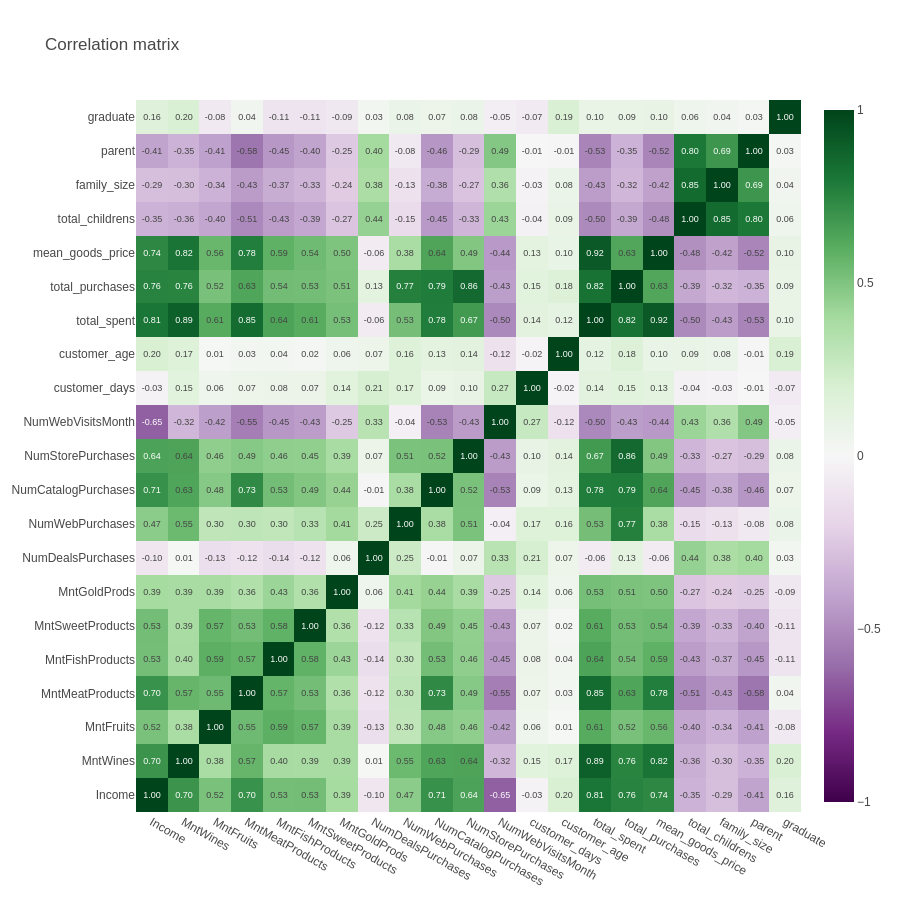

In [17]:
corr = customerStore_fstd.corr()
corr_plot(x=corr.index.values, y=corr.columns.values, z=corr.values, title='Correlation matrix').show('png')

In [18]:
customerStore_fstd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2206 non-null   float64
 1   MntWines             2206 non-null   int64  
 2   MntFruits            2206 non-null   int64  
 3   MntMeatProducts      2206 non-null   int64  
 4   MntFishProducts      2206 non-null   int64  
 5   MntSweetProducts     2206 non-null   int64  
 6   MntGoldProds         2206 non-null   int64  
 7   NumDealsPurchases    2206 non-null   int64  
 8   NumWebPurchases      2206 non-null   int64  
 9   NumCatalogPurchases  2206 non-null   int64  
 10  NumStorePurchases    2206 non-null   int64  
 11  NumWebVisitsMonth    2206 non-null   int64  
 12  customer_days        2206 non-null   int64  
 13  customer_age         2206 non-null   int64  
 14  total_spent          2206 non-null   int64  
 15  total_purchases      2206 non-null   i

In [19]:
std_scaler = StandardScaler()
std_scaler.fit(customerStore_fstd)
customerStore_scal = pd.DataFrame(std_scaler.transform(customerStore_fstd), columns=customerStore_fstd.columns )
customerStore_scal

Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.291407  0.974963   1.549059         1.687245         2.449823   
1    -0.264252 -0.874837  -0.638697        -0.719794        -0.652347   
2     0.926264  0.355399   0.568341        -0.180439         1.336691   
3    -1.192298 -0.874837  -0.563257        -0.657389        -0.506363   
4     0.298709 -0.394600   0.417461        -0.220556         0.150567   
...        ...       ...        ...              ...              ...   
2201  0.436752  1.194331   0.417461         0.064722         0.077575   
2202  0.568247  0.296110  -0.663843        -0.612815        -0.688844   
2203  0.236896  1.784251   0.543194         0.220734        -0.104906   
2204  0.814698  0.361328   0.090555         0.207362         0.771001   
2205  0.043165 -0.658434  -0.588404        -0.474633        -0.652347   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             1.480786      0.849960           0.361994         1.425194   
1            -0.635259     -0.735592          -0.168258        -1.132371   
2            -0.148812     -0.039496          -0.698509         1.425194   
3            -0.586614     -0.754928          -0.168258        -0.767004   
4            -0.002878     -0.561568           1.422497         0.329095   
...                ...           ...                ...              ...   
2201          2.210456      3.924386          -0.168258         1.790560   
2202         -0.659581     -0.696920           2.483000         1.425194   
2203         -0.367713     -0.387544          -0.698509        -0.767004   
2204          0.070089      0.327888          -0.168258         0.694461   
2205         -0.635259     -0.445552           0.361994        -0.401638   

      NumCatalogPurchases  ...  NumWebVisitsMonth  customer_days  \
0                2.500566  ...           0.714759       1.972244   
1               -0.573695  ...          -0.128878      -1.668745   
2               -0.232110  ...          -0.550697      -0.175337   
3               -0.915279  ...           0.292940      -1.926971   
4                0.109474  ...          -0.128878      -0.825206   
...                   ...  ...                ...            ...   
2201             0.109474  ...          -0.128878       0.121623   
2202            -0.232110  ...           0.714759      -1.944186   
2203             0.109474  ...           0.292940      -0.851028   
2204             0.792643  ...          -0.972515      -0.846725   
2205            -0.573695  ...           0.714759       1.158832   

      customer_age  total_spent  total_purchases  mean_goods_price  \
0         1.018496     1.673525         1.308371          1.195941   
1         1.274795    -0.966002        -1.197311         -1.024683   
2         0.335032     0.277398         1.029962          0.041549   
3        -1.288195    -0.922840        -0.918902         -0.955376   
4        -1.031896    -0.310270         0.194735         -0.246455   
...            ...          ...              ...               ...   
2201      0.164166     1.215343         0.473144          1.539015   
2202      1.958260    -0.273748         0.333940         -0.264515   
2203     -1.031896     1.049335         0.751553          1.044388   
2204      1.103929     0.388623         1.169167          0.086223   
2205      1.274795    -0.725290        -0.640492         -0.533984   

      total_childrens  family_size    parent  graduate  
0           -1.266906    -1.763261 -1.585162 -0.411142  
1            1.403705     0.447454  0.630850 -0.411142  
2           -1.266906    -0.657903 -1.585162 -0.411142  
3            0.068400     0.447454  0.630850 -0.411142  
4            0.068400     0.447454  0.630850  1.123510  
...               ...          ...       ...       ...  
2201         0.068400     0.447454  0.630850 -0.411142  
2202         2.739011     2.658170  0.630850  1.123510  
2203        -1.266906    -1.763261 -1.585162 -0

In [20]:
store_size = len(customerStore_scal.columns)
pca = PCA(n_components=store_size)
pca_fit = pca.fit(customerStore_scal)
PC_values = np.arange(store_size) + 1

var_ratio = pca.explained_variance_ratio_
pca_colnames = ['PCA_%s' % i for i in PC_values]

store_pca_df = pd.DataFrame(pca.transform(customerStore_scal), columns=(pca_colnames), index=customerStore_scal.index)

In [21]:
fpca = 0
perc = np.zeros(shape=store_size)
for i in range(store_size):
    fpca += var_ratio[i] * 100
    perc[i] = fpca

In [22]:
var_ratio_df = pd.DataFrame([var_ratio, perc], columns=pca_colnames)
var_ratio_df

PCA_1      PCA_2      PCA_3      PCA_4      PCA_5      PCA_6  \
0   0.438268   0.121129   0.071034   0.056342   0.041763   0.040131   
1  43.826767  55.939635  63.043001  68.677195  72.853459  76.866516   

       PCA_7      PCA_8      PCA_9     PCA_10  ...     PCA_12     PCA_13  \
0   0.032410   0.031252   0.027912   0.025989  ...   0.019395   0.018820   
1  80.107467  83.232687  86.023880  88.622809  ...  92.660997  94.542958   

      PCA_14     PCA_15     PCA_16     PCA_17     PCA_18      PCA_19  \
0   0.014523   0.013068   0.011260   0.008008   0.005477    0.002234   
1  95.995282  97.302062  98.428091  99.228897  99.776563  100.000000   

         PCA_20        PCA_21  
0  7.302525e-33  2.072426e-33  
1  1.000000e+02  1.000000e+02  

[2 rows x 21 columns]

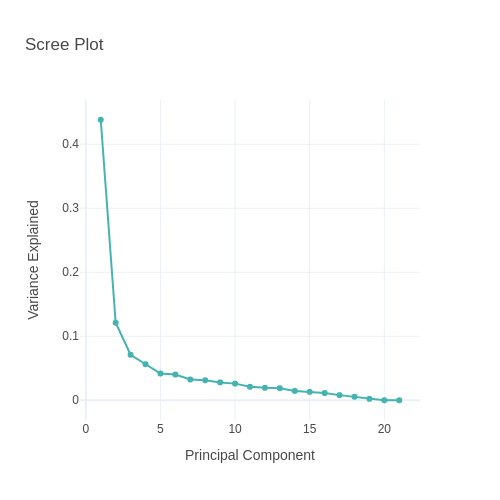

In [23]:
scree_plot(x=PC_values,
                    y=var_ratio).show('png')

In [24]:
store_80_df = store_pca_df.drop(['PCA_%s' % i for i in range(8,22)], axis=1)
store_80_df

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7
0     5.095900  0.017541  2.264328 -0.968364 -0.622247  1.969284 -0.179603
1    -3.127482 -0.457968 -1.743100  1.235162 -0.686565  0.520862  0.588436
2     2.456121 -0.697624  0.082492 -0.265002 -1.565250 -0.971849 -0.724627
3    -2.998929 -1.203136 -0.315213  0.885938  0.506055 -1.506884  0.277141
4    -0.384960  0.868662 -0.503063  0.448059  0.996769 -1.135479 -0.588670
...        ...       ...       ...       ...       ...       ...       ...
2201  2.755913  1.644970  1.323133  1.000658 -0.517226  0.205449  2.394196
2202 -1.878735  4.287946 -2.620787  0.923852 -0.338204 -0.096317  0.428126
2203  2.611063 -1.567538  0.077216 -1.284884  0.440679 -1.612545 -0.083035
2204  1.794893  1.284767 -1.852947  0.518298 -0.700828 -0.458642 -0.268177
2205 -2.484767  1.645233 -0.811452 -0.411995 -0.023383  1.685180 -0.452809

[2206 rows x 7 columns]

In [25]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(store_80_df)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

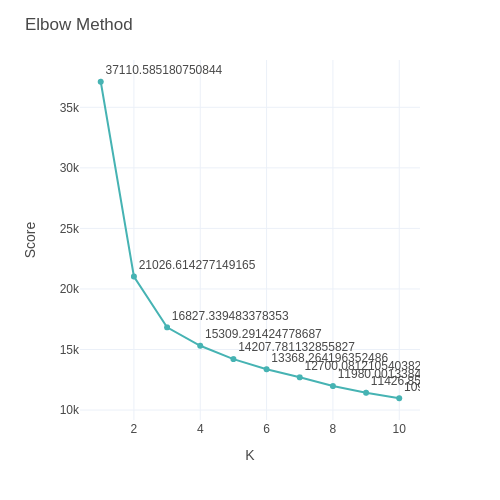

In [26]:
line_plot(x=K, y=distortions,title='Elbow Method',xaxis_title='K', yaxis_title='Score').show('png')

In [27]:
AC = KMeans(n_clusters=4)

AC_clust = AC.fit_predict(store_80_df)
store_80_df['Clusters'] = AC_clust
store_80_df['Clusters'] = store_80_df['Clusters'].replace({0:'Group_1',1:'Group_2',2:'Group_3',3:'Group_4'})
customerStore['Clusters'] = AC_clust
customerStore['Clusters'] = customerStore['Clusters'].replace({0:'Group_1',1:'Group_2',2:'Group_3',3:'Group_4'})
customerStore = customerStore.sort_values('Clusters')

customerStore['single_together'] = customerStore['single_together'].replace({1:'Single',2:'Together'})

customerStore['graduate'] = customerStore['graduate'].replace({0:'Basic',1:'Graduation',2:'Master'})

colors = ['#20bf6b', '#fa8231', '#3867d6', '#eb3b5a']
cluster_names = ['Group_1', 'Group_2', 'Group_3', 'Group_4']
cluster_colors = {'Group_1':'#20bf6b', 'Group_2':'#fa8231', 'Group_3':'#3867d6', 'Group_4':'#eb3b5a'}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



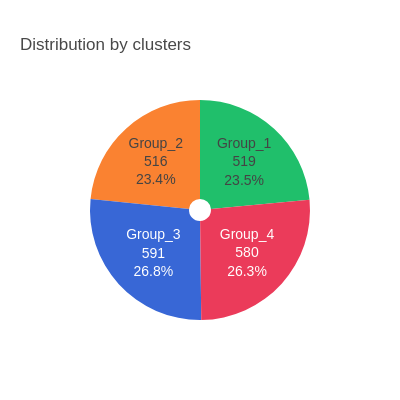

In [28]:
cluster_count = customerStore['Clusters'].value_counts().sort_index()
pie_plot(labels=cluster_count.index,values=cluster_count.values,title='Distribution by clusters').show('png')

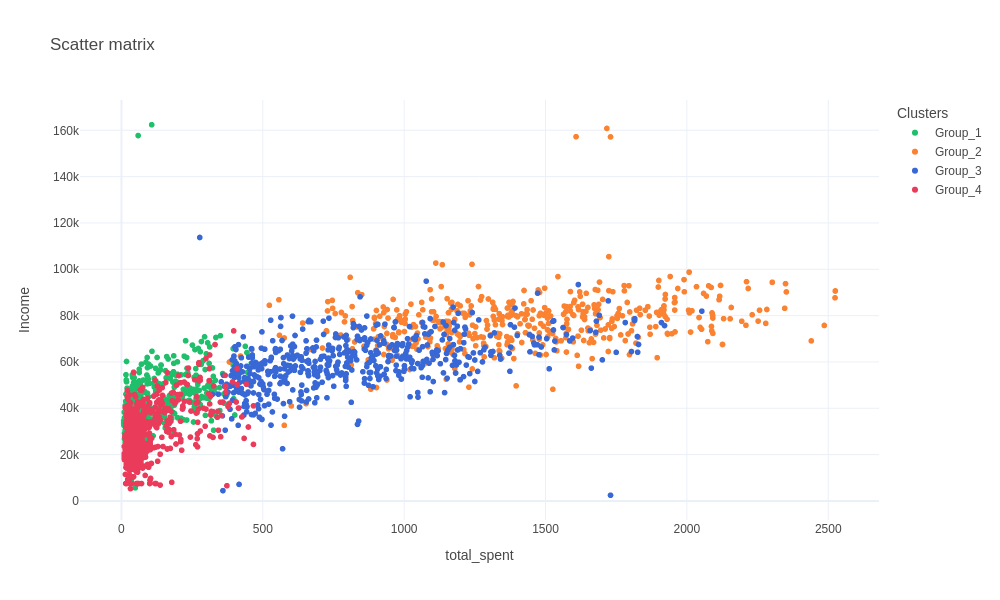

In [29]:
scat_plot(dataf=customerStore,x='total_spent',y='Income',color='Clusters',title='Scatter matrix').show('png')

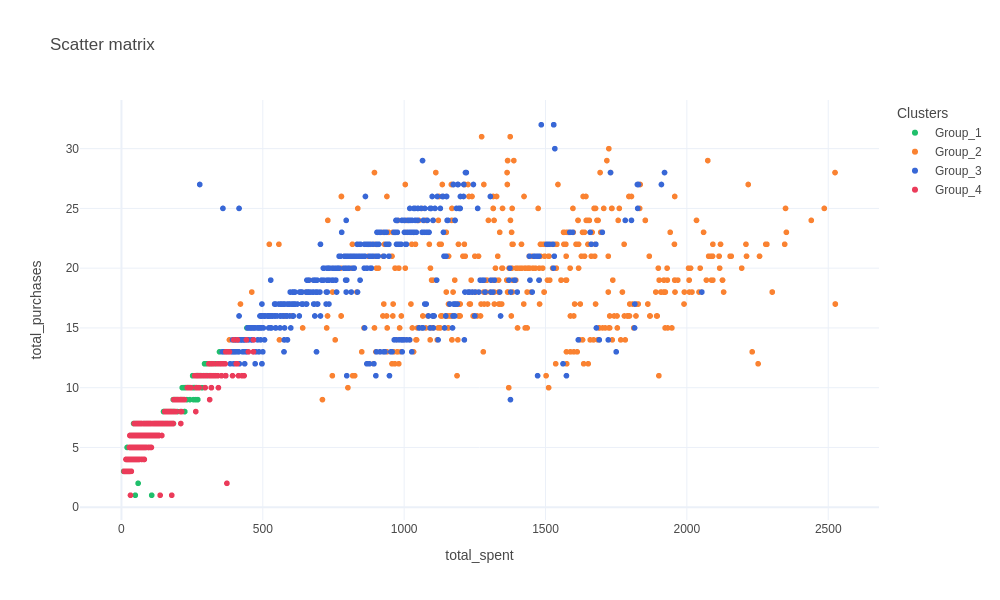

In [30]:
scat_plot(dataf=customerStore,x='total_spent',y='total_purchases',color='Clusters',title='Scatter matrix').show('png')

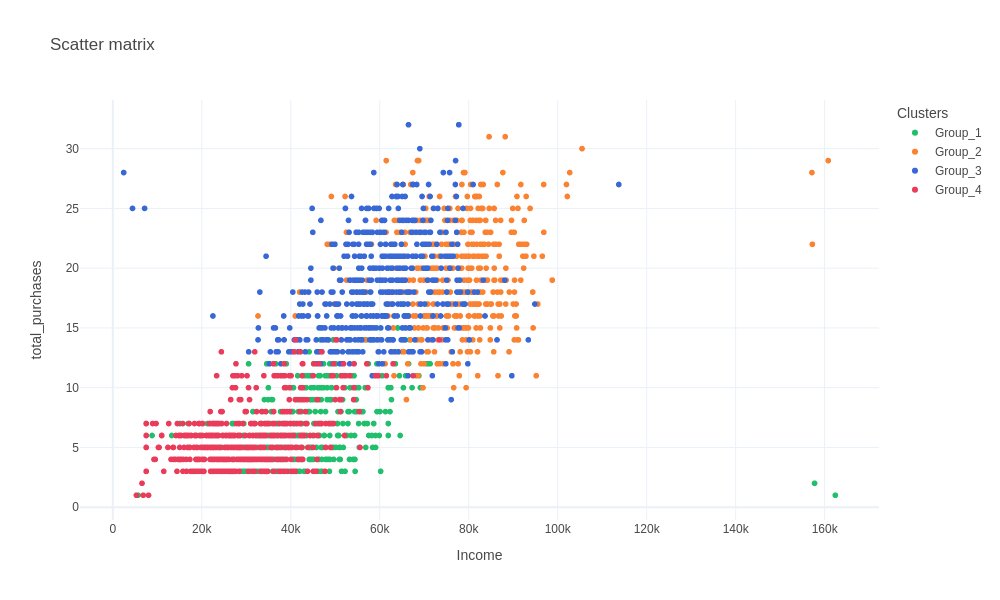

In [31]:
scat_plot(dataf=customerStore,x='Income',y='total_purchases',color='Clusters',title='Scatter matrix').show('png')

In [32]:
box_plot(dataf=customerStore,y='customer_age',color='Clusters',title='Customer age by clusters').show('png')

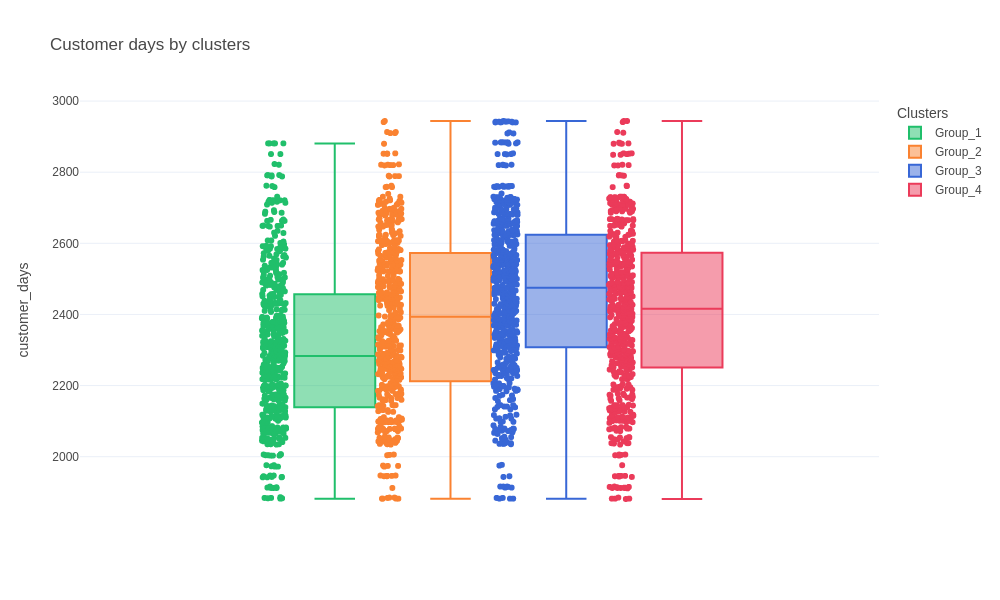

In [33]:
box_plot(dataf=customerStore,y='customer_days',color='Clusters',title='Customer days by clusters').show('png')

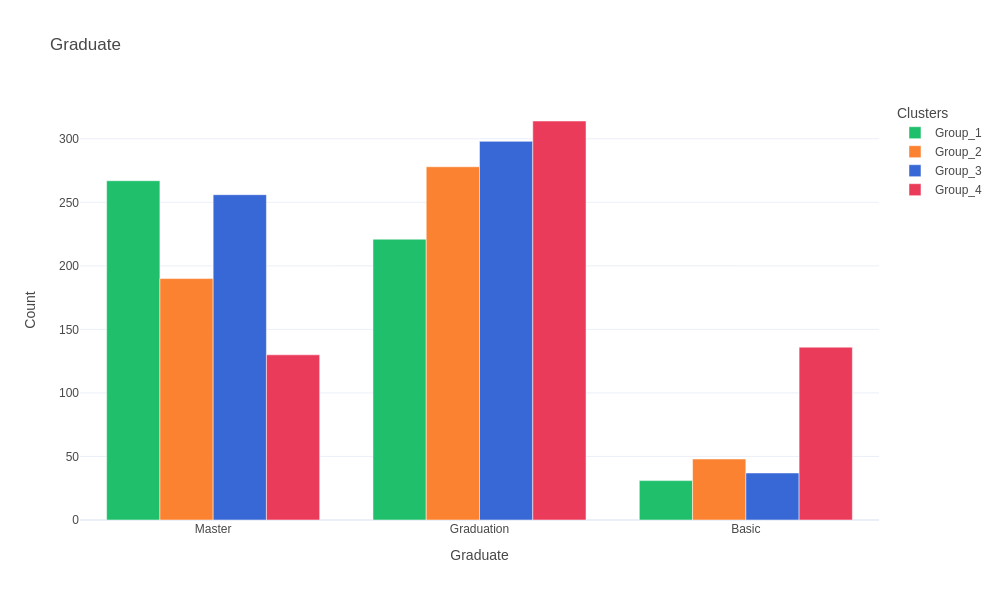

In [34]:
gr_bar_df = customerStore.value_counts(['graduate', 'Clusters']).reset_index().sort_values(by='Clusters')
gr_bar_df['Clusters'] = gr_bar_df['Clusters'].astype(str)

bar_plot(dataf=gr_bar_df,x='graduate',y=0,color='Clusters',title='Graduate',x_label='Graduate',y_label='Count').show('png')

In [35]:
st_bar_df = customerStore.value_counts(['single_together', 'Clusters']).reset_index().sort_values(by='Clusters')
st_bar_df['Clusters'] = st_bar_df['Clusters'].astype(str)

bar_plot(dataf=st_bar_df,x='single_together',y=0,color='Clusters',title='Marital status',x_label='Marital status',y_label='Count').show('png')

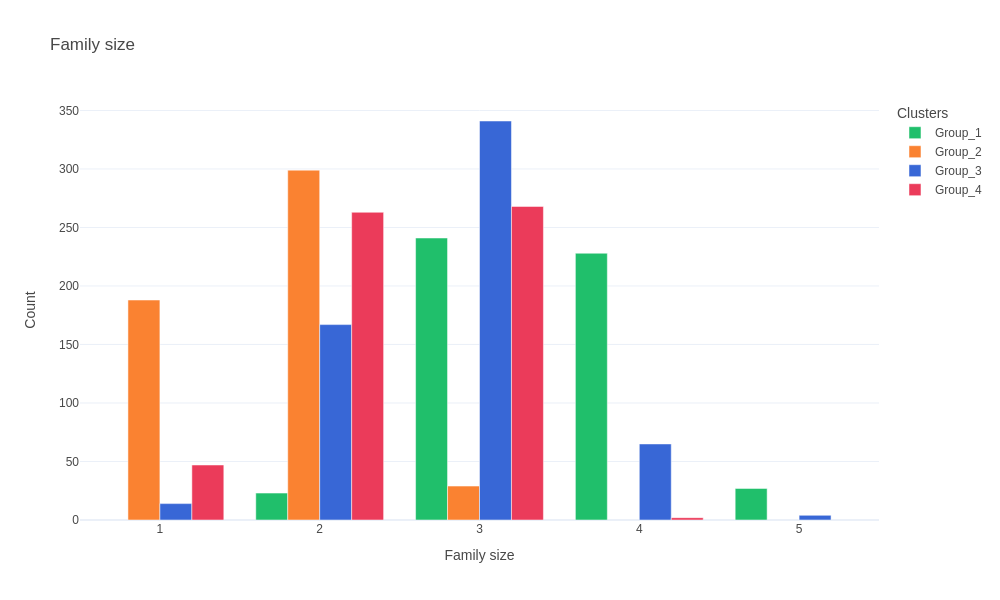

In [36]:
fs_bar_df = customerStore.value_counts(['family_size', 'Clusters']).reset_index().sort_values(by='Clusters')
fs_bar_df['Clusters'] = fs_bar_df['Clusters'].astype(str)

bar_plot(dataf=fs_bar_df,x='family_size',y=0,color='Clusters',title='Family size',x_label='Family size',y_label='Count').show('png')

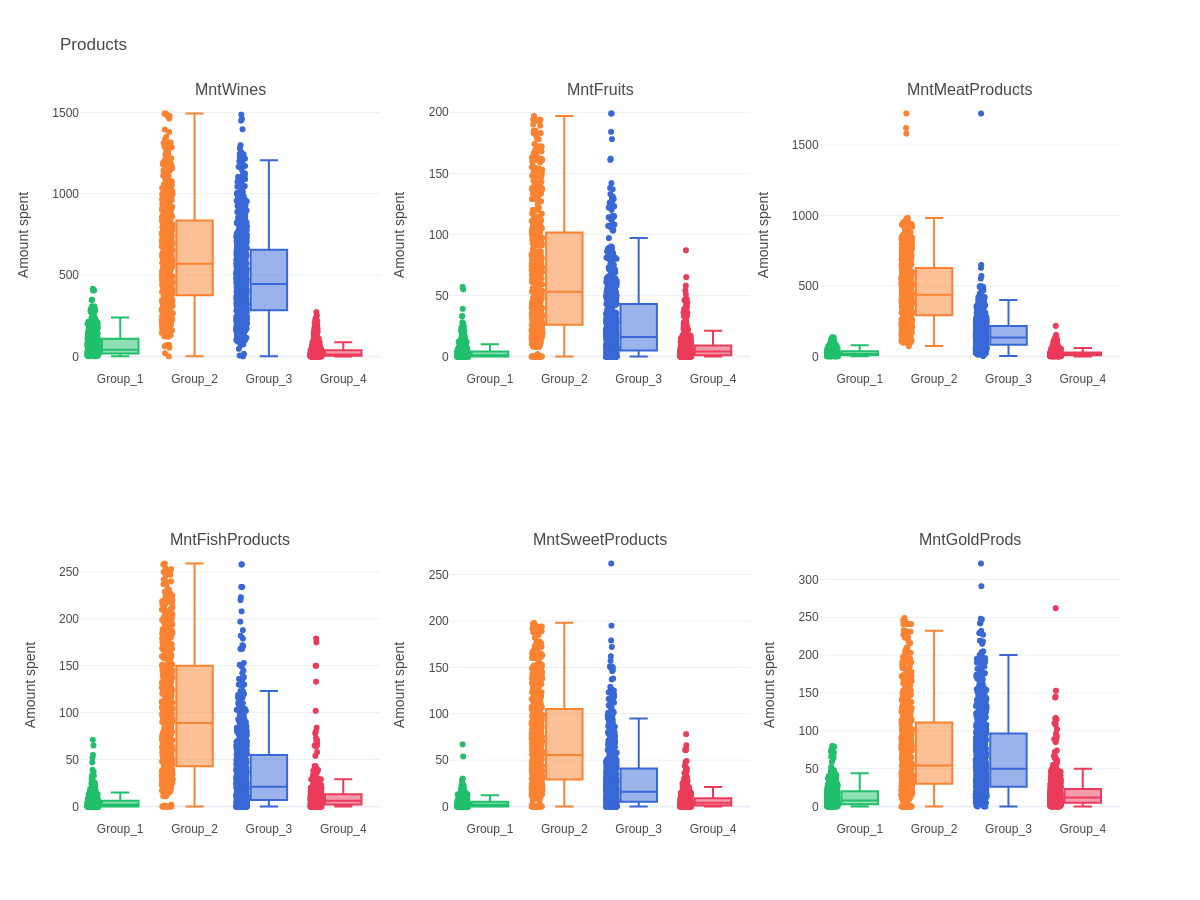

In [37]:
cluster_pars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
box_pos_r = [1, 1, 1, 2, 2, 2]
box_pos_c = [1, 2, 3, 1, 2, 3]
cluster_names = customerStore['Clusters'].unique()
fig_box = make_subplots(rows=2, cols=3, subplot_titles=cluster_pars)

for c_p, b_p_r, b_p_c in zip(cluster_pars, box_pos_r, box_pos_c):
    for c_n, c_c in zip(cluster_names, colors):
        m_c_c = customerStore[customerStore['Clusters'] == c_n]
        fig_box.add_trace(go.Box(x=m_c_c['Clusters'], y=m_c_c[c_p],marker_color=c_c,boxpoints='all'), col=b_p_c, row=b_p_r)

        fig_box.update_yaxes(title='Amount spent', col=b_p_c, row=b_p_r)

fig_box.update_layout(height = 900,width=1200,title='Products',font_color='#484848',template='plotly_white',showlegend=False,)
fig_box.show('png')

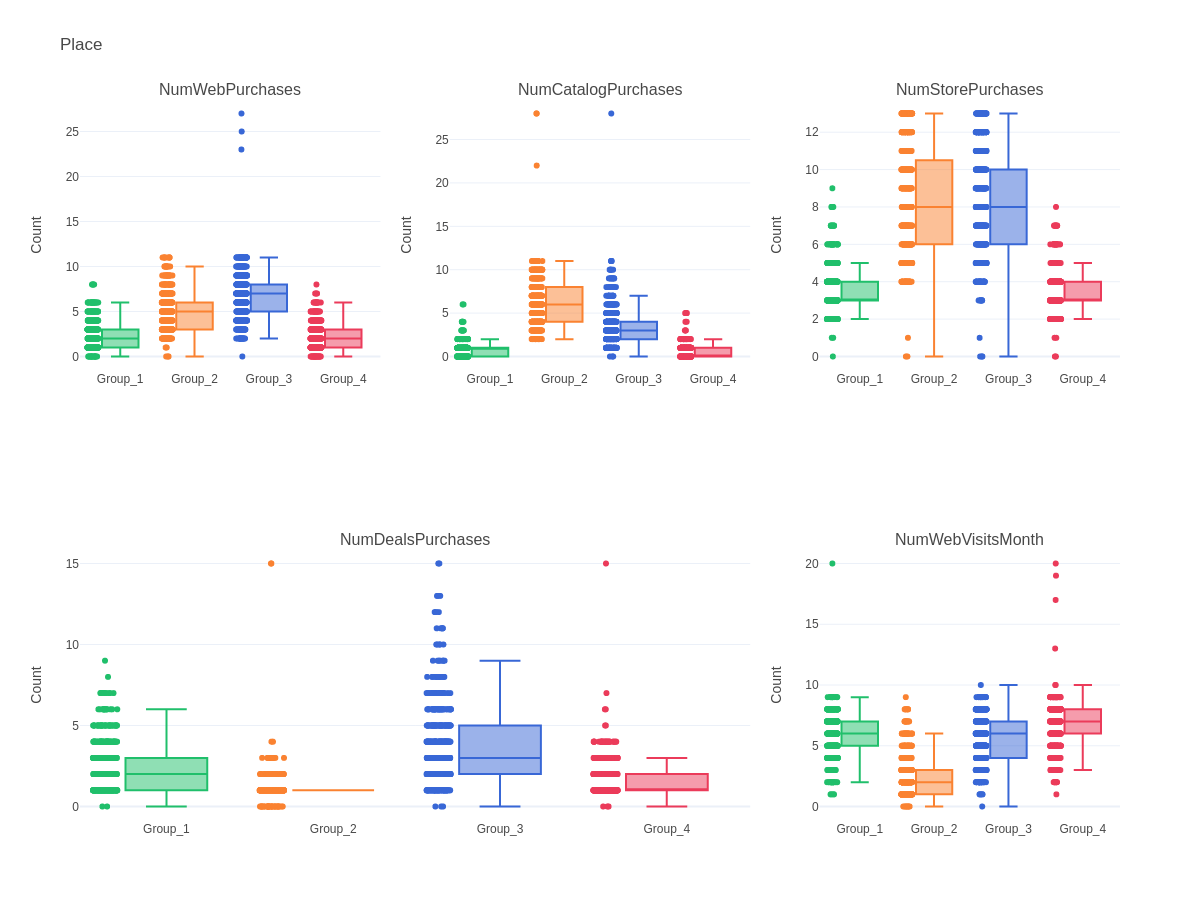

In [38]:
cluster_nums = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']
num_pos_r = [1, 1, 1, 2, 2]
num_pos_c = [1, 2, 3, 1, 3]
cluster_names = customerStore['Clusters'].unique()
fig_num = make_subplots(rows=2, cols=3, subplot_titles=cluster_nums, specs=[[{}, {}, {}], [{"colspan": 2}, None, {"colspan":1}]])

for c_ns, n_p_r, n_p_c in zip(cluster_nums, num_pos_r, num_pos_c):
    for c_n, c_c in zip(cluster_names, colors):
        m_c_c = customerStore[customerStore['Clusters'] == c_n]
        fig_num.add_trace(go.Box(x=m_c_c['Clusters'], y=m_c_c[c_ns],marker_color=c_c,boxpoints='all'), col=n_p_c, row=n_p_r)

        fig_num.update_yaxes(title='Count', col=n_p_c, row=n_p_r)

fig_num.update_layout(height = 900,width=1200,title='Place',font_color='#484848',template='plotly_white',showlegend=False, )
fig_num.show('png')

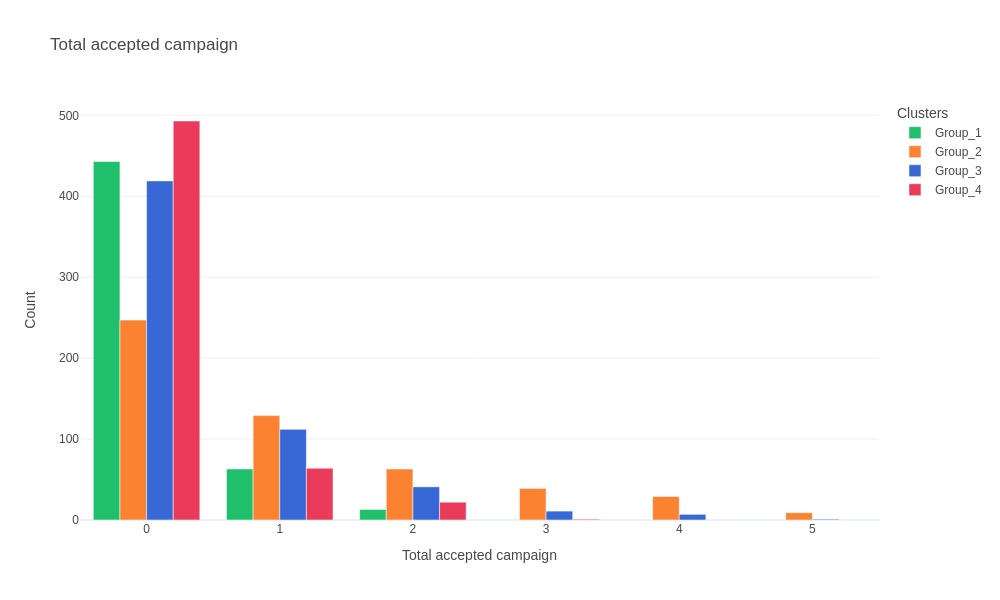

In [39]:
tc_bar_df = customerStore.value_counts(['total_accepted_cmp', 'Clusters']).reset_index().sort_values(by='Clusters')
tc_bar_df['Clusters'] = tc_bar_df['Clusters'].astype(str)

bar_plot(dataf=tc_bar_df,x='total_accepted_cmp',y=0,color='Clusters',title='Total accepted campaign',x_label='Total accepted campaign',y_label='Count').show('png')

In [40]:
bar_titles = ('Accepted 1st campaign', 'Accepted 2nd campaign', 'Accepted 3rd campaign',
              'Accepted 4th campaign', 'Accepted 5th campaign', 'Accepted last campaign')
bar_x = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
bar_pos_r = [1, 1, 1, 2, 2, 2]
bar_pos_c = [1, 2, 3, 1, 2, 3]
fig_bar = make_subplots(rows=2, cols=3, subplot_titles=bar_titles)

for b_x, b_p_r, b_p_c, b_t in zip(bar_x, bar_pos_r, bar_pos_c, bar_titles):
    mark_calc = customerStore[customerStore[b_x] == 'Accepted']['Clusters'].value_counts().sort_index()
    for c_n, m_i, m_v in zip(cluster_names, mark_calc.index, mark_calc.values):
        fig_bar.add_trace(go.Bar(x=[m_i], y=[m_v],text=str(m_v),marker_color=cluster_colors[m_i]), col=b_p_c, row=b_p_r)
        fig_bar.update_yaxes(visible=False, col=b_p_c, row=b_p_r)

fig_bar.update_layout(height = 600,width=1000,title='Promotion',font_color='#484848',template='plotly_white',showlegend=False,)
fig_bar.show('png')

In [41]:
customerStore[customerStore['Clusters'] == 'Group_1'].describe()

ID         Income    MntWines   MntFruits  MntMeatProducts  \
count    519.000000     519.000000  519.000000  519.000000       519.000000   
mean    5551.855491   42527.092486   74.468208    3.678227        27.102119   
std     3278.068433   13277.808290   77.111127    6.419875        26.087231   
min        9.000000    5648.000000    1.000000    0.000000         1.000000   
25%     2658.500000   34951.000000   19.000000    0.000000         9.000000   
50%     5493.000000   42033.000000   41.000000    1.000000        17.000000   
75%     8310.000000   49173.500000  109.500000    4.000000        37.000000   
max    11188.000000  162397.000000  416.000000   57.000000       137.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       519.000000        519.000000    519.000000         519.000000   
mean          5.211946          3.720617     13.712909           2.576108   
std           8.468963          6.130261     14.667369           1.565028   
min           0.000000          0.000000      0.000000           0.000000   
25%           0.000000          0.000000      3.000000           1.000000   
50%           2.000000          2.000000      8.000000           2.000000   
75%           6.000000          5.000000     20.000000           3.000000   
max          71.000000         67.000000     80.000000           9.000000   

       NumWebPurchases  ...  NumWebVisitsMonth  customer_days  customer_age  \
count       519.000000  ...         519.000000     519.000000    519.000000   
mean          2.454721  ...           6.017341    2309.098266     55.308285   
std           1.519936  ...           1.806703     217.546569      8.910611   
min           0.000000  ...           1.000000    1882.000000     35.000000   
25%           1.000000  ...           5.000000    2139.000000     48.000000   
50%           2.000000  ...           6.000000    2283.000000     54.000000   
75%           3.000000  ...           7.000000    2456.000000     63.000000   
max           8.000000  ...          20.000000    2881.000000     74.000000   

       total_spent  total_purchases  mean_goods_price  total_accepted_cmp  \
count   519.000000       519.000000        519.000000          519.000000   
mean    127.894027         6.799615         16.053958            0.171484   
std     108.632009         2.984244          8.734755            0.438799   
min       8.000000         1.000000          2.666667            0.000000   
25%      44.000000         4.000000          9.000000            0.000000   
50%      81.000000         6.000000         14.500000            0.000000   
75%     205.000000         9.000000         23.050000            0.000000   
max     459.000000        15.000000        107.000000            2.000000   

       total_childrens  family_size  parent  
count       519.000000   519.000000   519.0  
mean          1.780347     3.499037     1.0  
std           0.587777     0.665982     0.0  
min           1.000000     2.000000     1.0  
25%           1.000000     3.000000     1.0  
50%           2.000000     3.000000     1.0  
75%           2.000000     4.000000     1.0  
max           3.000000     5.000000     1.0  

[8 rows x 22 columns]

In [42]:
customerStore[customerStore['Clusters'] == 'Group_2'].describe()

ID         Income     MntWines   MntFruits  MntMeatProducts  \
count    516.000000     516.000000   516.000000  516.000000       516.000000   
mean    5703.329457   76820.050388   620.238372   67.356589       474.155039   
std     3197.755128   11689.243022   319.952726   50.932821       243.526533   
min        0.000000   32632.000000     1.000000    0.000000        74.000000   
25%     3002.500000   70419.000000   376.750000   26.000000       292.750000   
50%     5544.500000   77009.500000   570.500000   53.000000       438.000000   
75%     8539.000000   82572.250000   835.250000  101.250000       626.500000   
max    11101.000000  160803.000000  1493.000000  197.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       516.000000        516.000000    516.000000         516.000000   
mean         99.844961         69.936047     76.075581           1.133721   
std          66.060984         52.099548     60.822135           1.010405   
min           0.000000          0.000000      0.000000           0.000000   
25%          43.000000         29.000000     30.000000           1.000000   
50%          89.000000         55.500000     54.000000           1.000000   
75%         150.000000        105.000000    111.000000           1.000000   
max         259.000000        198.000000    249.000000          15.000000   

       NumWebPurchases  ...  NumWebVisitsMonth  customer_days  customer_age  \
count       516.000000  ...         516.000000     516.000000    516.000000   
mean          4.959302  ...           2.643411    2391.767442     51.680233   
std           2.078155  ...           1.677022     233.555058     13.704243   
min           0.000000  ...           0.000000    1882.000000     25.000000   
25%           3.000000  ...           1.000000    2214.000000     40.000000   
50%           5.000000  ...           2.000000    2393.500000     51.000000   
75%           6.000000  ...           3.000000    2573.000000     63.000000   
max          11.000000  ...           9.000000    2944.000000     79.000000   

       total_spent  total_purchases  mean_goods_price  total_accepted_cmp  \
count   516.000000       516.000000        516.000000          516.000000   
mean   1407.606589        19.368217         75.279924            1.032946   
std     416.261422         4.113921         25.754461            1.300067   
min     382.000000         9.000000         23.772727            0.000000   
25%    1102.750000        16.000000         58.613487            0.000000   
50%    1379.500000        19.000000         71.736842            1.000000   
75%    1682.750000        22.000000         88.905844            2.000000   
max    2525.000000        31.000000        187.666667            5.000000   

       total_childrens  family_size      parent  
count       516.000000   516.000000  516.000000  
mean          0.100775     1.691860    0.098837  
std           0.307700     0.571161    0.298733  
min           0.000000     1.000000    0.000000  
25%           0.000000     1.000000    0.000000  
50%           0.000000     2.000000    0.000000  
75%           0.000000     2.000000    0.000000  
max           2.000000     3.000000    1.000000  

[8 rows x 22 columns]

In [43]:
customerStore[customerStore['Clusters'] == 'Group_3'].describe()

ID         Income     MntWines   MntFruits  MntMeatProducts  \
count    591.000000     591.000000   591.000000  591.000000       591.000000   
mean    5537.152284   59994.395939   503.698816   29.345178       162.893401   
std     3272.354020   11539.448265   287.418051   34.930769       124.442052   
min        1.000000    2447.000000     1.000000    0.000000         3.000000   
25%     2787.500000   53676.500000   284.500000    5.000000        83.500000   
50%     5462.000000   60491.000000   445.000000   16.000000       135.000000   
75%     8597.500000   66769.500000   656.000000   43.000000       215.500000   
max    11176.000000  113734.000000  1486.000000  199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       591.000000        591.000000    591.000000         591.000000   
mean         38.216582         29.758037     67.653130           3.685279   
std          44.768865         36.591988     56.087339           2.354031   
min           0.000000          0.000000      0.000000           0.000000   
25%           7.000000          5.000000     26.000000           2.000000   
50%          21.000000         16.000000     50.000000           3.000000   
75%          55.000000         41.000000     96.000000           5.000000   
max         258.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  ...  NumWebVisitsMonth  customer_days  customer_age  \
count       591.000000  ...         591.000000     591.000000    591.000000   
mean          6.693739  ...           5.632826    2457.218274     54.307953   
std           2.635342  ...           1.885414     225.914544      9.871887   
min           0.000000  ...           0.000000    1882.000000     28.000000   
25%           5.000000  ...           4.000000    2308.000000     46.000000   
50%           7.000000  ...           6.000000    2475.000000     54.000000   
75%           8.000000  ...           7.000000    2624.000000     63.000000   
max          27.000000  ...          10.000000    2944.000000     77.000000   

       total_spent  total_purchases  mean_goods_price  total_accepted_cmp  \
count   591.000000       591.000000        591.000000          591.000000   
mean    831.565144        18.355330         45.456530            0.439932   
std     349.102630         4.156143         18.700991            0.820931   
min     277.000000         9.000000         10.259259            0.000000   
25%     543.000000        15.000000         33.972222            0.000000   
50%     775.000000        18.000000         39.350000            0.000000   
75%    1048.000000        21.000000         46.013889            1.000000   
max    2053.000000        32.000000        152.888889            5.000000   

       total_childrens  family_size      parent  
count       591.000000   591.000000  591.000000  
mean          1.123519     2.793570    0.950931  
std           0.472969     0.687436    0.216196  
min           0.000000     1.000000    0.000000  
25%           1.000000     2.000000    1.000000  
50%           1.000000     3.000000    1.000000  
75%           1.000000     3.000000    1.000000  
max           3.000000     5.000000    1.000000  

[8 rows x 22 columns]

In [44]:
customerStore[customerStore['Clusters'] == 'Group_4'].describe()

ID        Income    MntWines   MntFruits  MntMeatProducts  \
count    580.000000    580.000000  580.000000  580.000000       580.000000   
mean    5532.748276  30069.879310   32.594828    7.289655        24.932759   
std     3238.364100  11183.780143   46.661938   10.253719        27.577818   
min       20.000000   5305.000000    0.000000    0.000000         0.000000   
25%     2814.750000  22411.750000    5.000000    1.000000         8.000000   
50%     5310.000000  29513.000000   13.000000    4.000000        15.000000   
75%     8322.750000  37702.000000   38.000000    9.000000        29.000000   
max    11191.000000  73395.000000  272.000000   87.000000       217.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count       580.000000        580.000000    580.000000         580.000000   
mean         11.143103          7.272414     18.625862           1.744828   
std          18.946936         10.091375     23.384590           1.121492   
min           0.000000          0.000000      0.000000           0.000000   
25%           2.000000          1.000000      5.000000           1.000000   
50%           6.000000          4.000000     12.000000           1.000000   
75%          13.000000          9.000000     23.000000           2.000000   
max         179.000000         78.000000    262.000000          15.000000   

       NumWebPurchases  ...  NumWebVisitsMonth  customer_days  customer_age  \
count       580.000000  ...         580.000000     580.000000    580.000000   
mean          2.162069  ...           6.703448    2406.553448     43.467241   
std           1.357360  ...           1.879346     228.317301      9.979113   
min           0.000000  ...           1.000000    1881.000000     24.000000   
25%           1.000000  ...           6.000000    2251.000000     36.000000   
50%           2.000000  ...           7.000000    2416.000000     42.000000   
75%           3.000000  ...           8.000000    2573.250000     48.000000   
max           8.000000  ...          20.000000    2944.000000     80.000000   

       total_spent  total_purchases  mean_goods_price  total_accepted_cmp  \
count   580.000000       580.000000        580.000000          580.000000   
mean    101.858621         5.908621         15.166226            0.191379   
std      97.942692         2.519752         13.393311            0.491301   
min      10.000000         1.000000          3.333333            0.000000   
25%      37.000000         4.000000          8.600000            0.000000   
50%      65.000000         5.000000         12.450000            0.000000   
75%     125.500000         7.000000         19.571429            0.000000   
max     467.000000        14.000000        186.500000            3.000000   

       total_childrens  family_size      parent  
count       580.000000   580.000000  580.000000  
mean          0.781034     2.387931    0.768966  
std           0.442148     0.638050    0.421858  
min           0.000000     1.000000    0.000000  
25%           1.000000     2.000000    1.000000  
50%           1.000000     2.000000    1.000000  
75%           1.000000     3.000000    1.000000  
max           2.000000     4.000000    1.000000  

[8 rows x 22 columns]